In [2]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pyproj import Geod
warnings.filterwarnings('ignore')

## csv file name in directory

In [2]:
#read the path
file_path = r"D:\pum\coursera\Google Data Analytic\Dataset - trip data\2021 - trip data"
#list all the files from the directory
file_list = os.listdir(file_path)
file_list


['202101-divvy-tripdata.csv',
 '202102-divvy-tripdata.csv',
 '202103-divvy-tripdata.csv',
 '202104-divvy-tripdata.csv',
 '202105-divvy-tripdata.csv',
 '202106-divvy-tripdata.csv',
 '202107-divvy-tripdata.csv',
 '202108-divvy-tripdata.csv',
 '202109-divvy-tripdata.csv',
 '202110-divvy-tripdata.csv',
 '202111-divvy-tripdata.csv',
 '202112-divvy-tripdata.csv',
 'combined_csv.csv']

## combine 12 csv files into one

In [3]:
os.chdir(r"D:\pum\coursera\Google Data Analytic\Dataset - trip data\2021 - trip data")

extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

In [4]:
combined_csv.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


In [5]:
combined_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16785189 entries, 0 to 11190125
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 1.8+ GB


## check null & drop duplicate 

In [6]:
combined_csv.isna().sum() 

ride_id                     0
rideable_type               0
started_at                  0
ended_at                    0
start_station_name    2072427
start_station_id      2072418
end_station_name      2217510
end_station_id        2217510
start_lat                   0
start_lng                   0
end_lat                 14313
end_lng                 14313
member_casual               0
dtype: int64

In [7]:
combined_csv.drop_duplicates(subset=['ride_id', 'started_at'], keep='last')

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
5595063,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.890000,-87.720000,member
5595064,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.900000,-87.690000,member
5595065,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.900000,-87.700000,member
5595066,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.920000,-87.690000,member
5595067,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.900000,-87.700000,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11190121,847431F3D5353AB7,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,Canal St & Madison St,13341,NaN,NaN,41.882289,-87.639752,41.890000,-87.610000,casual
11190122,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,Canal St & Madison St,13341,Kingsbury St & Kinzie St,KA1503000043,41.882123,-87.640053,41.889106,-87.638862,member
11190123,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,Canal St & Madison St,13341,Dearborn St & Monroe St,TA1305000006,41.881956,-87.639955,41.880254,-87.629603,member
11190124,C414F654A28635B8,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,Lawndale Ave & 16th St,362.0,NaN,NaN,41.860000,-87.720000,41.850000,-87.710000,member


## Change object type to date time format


In [8]:
combined_csv[["started_at", "ended_at"]] = combined_csv[["started_at", "ended_at"]].apply(pd.to_datetime)

In [9]:
combined_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16785189 entries, 0 to 11190125
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 1.8+ GB


In [11]:
combined_csv['ride_range'] = combined_csv['ended_at'] - combined_csv['started_at']

In [12]:
combined_csv.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_range
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member,0 days 00:10:25
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member,0 days 00:04:04
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member,0 days 00:01:20
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member,0 days 00:11:42
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual,0 days 00:00:43


In [13]:
combined_csv['year'] = combined_csv['started_at'].dt.year
combined_csv['month'] = combined_csv['started_at'].dt.month
combined_csv['date'] = combined_csv['started_at'].dt.date
combined_csv['time'] = combined_csv['started_at'].dt.time
combined_csv['day_name'] = combined_csv['started_at'].dt.day_name()
combined_csv['dayofweek'] = combined_csv['started_at'].dt.dayofweek

In [14]:
combined_csv.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_range,year,month,date,time,day_name,dayofweek
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member,0 days 00:10:25,2021,1,2021-01-23,16:14:19,Saturday,5
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member,0 days 00:04:04,2021,1,2021-01-27,18:43:08,Wednesday,2
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member,0 days 00:01:20,2021,1,2021-01-21,22:35:54,Thursday,3
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member,0 days 00:11:42,2021,1,2021-01-07,13:31:13,Thursday,3
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual,0 days 00:00:43,2021,1,2021-01-23,02:24:02,Saturday,5


In [15]:
combined_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16785189 entries, 0 to 11190125
Data columns (total 20 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       object         
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   start_lat           float64        
 9   start_lng           float64        
 10  end_lat             float64        
 11  end_lng             float64        
 12  member_casual       object         
 13  ride_range          timedelta64[ns]
 14  year                int64          
 15  month               int64          
 16  date                object         
 17  time                object         
 18  day_name            object         
 19  dayofweek          

## add useage time for bike rental

In [17]:
combined_csv['usage_minutes'] = combined_csv['ride_range'] / pd.Timedelta(minutes=1)

In [18]:
combined_csv.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,ride_range,year,month,date,time,day_name,dayofweek,usage_minutes
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,...,-87.72,member,0 days 00:10:25,2021,1,2021-01-23,16:14:19,Saturday,5,10.416667
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,...,-87.69,member,0 days 00:04:04,2021,1,2021-01-27,18:43:08,Wednesday,2,4.066667
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,...,-87.70,member,0 days 00:01:20,2021,1,2021-01-21,22:35:54,Thursday,3,1.333333
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,...,-87.69,member,0 days 00:11:42,2021,1,2021-01-07,13:31:13,Thursday,3,11.700000
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,...,-87.70,casual,0 days 00:00:43,2021,1,2021-01-23,02:24:02,Saturday,5,0.716667


In [19]:
combined_csv["usage_minutes"].mean()

21.935344826922655

In [21]:
combined_csv['ride_range'].mean()

Timedelta('0 days 00:21:56.120689615')

In [22]:
combined_csv['ride_range'].max()

Timedelta('38 days 20:24:09')

In [23]:
combined_csv['ride_range'].min()

Timedelta('-1 days +23:01:58')

### Notice : There are outlier data, usage time must not less than 1 min and I assume custumer should not rent the bike more than 150 min for each time

## Remove outlier

In [24]:
combined_csv["usage_minutes"].value_counts()

6.283333       16221
5.866667       16206
6.416667       16041
5.783333       16023
6.350000       15945
               ...  
2076.066667        3
200.883333         3
638.283333         3
1066.016667        3
224.216667         3
Name: usage_minutes, Length: 25645, dtype: int64

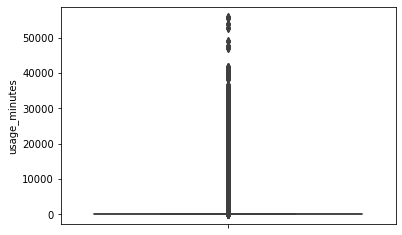

In [25]:
sns.boxplot( y=combined_csv["usage_minutes"] );
plt.show()

In [26]:
combined_csv["usage_minutes"].describe()

count    1.678519e+07
mean     2.193534e+01
std      1.783347e+02
min     -5.803333e+01
25%      6.750000e+00
50%      1.200000e+01
75%      2.178333e+01
max      5.594415e+04
Name: usage_minutes, dtype: float64

## with Standard Deviation (2 sigma)

In [27]:
factor = 2
upper_lim = combined_csv["usage_minutes"].mean() + combined_csv["usage_minutes"].std() * factor
lower_lim = combined_csv["usage_minutes"].mean() - combined_csv["usage_minutes"].std() * factor
drop_outlier1 = combined_csv[(combined_csv["usage_minutes"] < upper_lim) & (combined_csv["usage_minutes"] > lower_lim)]
print(drop_outlier1.shape)

(16751457, 21)


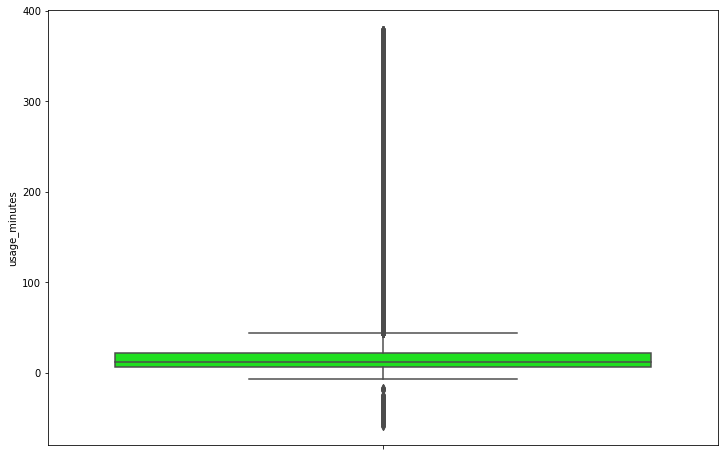

In [33]:
fig = plt.figure(figsize=(12,8))
sns.boxplot(y=drop_outlier1['usage_minutes'], color='lime')
plt.show()

In [29]:
drop_outlier1.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,ride_range,year,month,date,time,day_name,dayofweek,usage_minutes
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,...,-87.72,member,0 days 00:10:25,2021,1,2021-01-23,16:14:19,Saturday,5,10.416667
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,...,-87.69,member,0 days 00:04:04,2021,1,2021-01-27,18:43:08,Wednesday,2,4.066667
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,...,-87.70,member,0 days 00:01:20,2021,1,2021-01-21,22:35:54,Thursday,3,1.333333
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,...,-87.69,member,0 days 00:11:42,2021,1,2021-01-07,13:31:13,Thursday,3,11.700000
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,...,-87.70,casual,0 days 00:00:43,2021,1,2021-01-23,02:24:02,Saturday,5,0.716667


## Remove data with rental time < 1 min

In [30]:
drop_outlier1.drop(drop_outlier1[drop_outlier1['usage_minutes'] < 1].index, inplace = True)


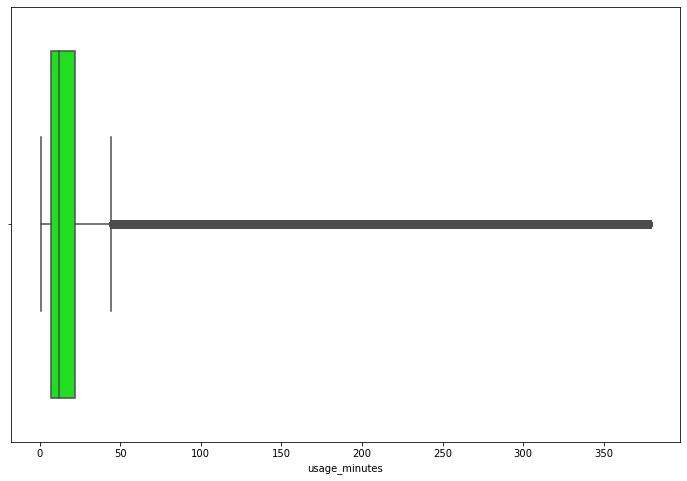

In [32]:
fig = plt.figure(figsize=(12,8))
sns.boxplot(x=drop_outlier1['usage_minutes'], color='lime')
plt.show()

## Remove rental time more than 200 min

In [33]:
drop_outlier1.drop(drop_outlier1[drop_outlier1['usage_minutes'] > 150].index, inplace = True)

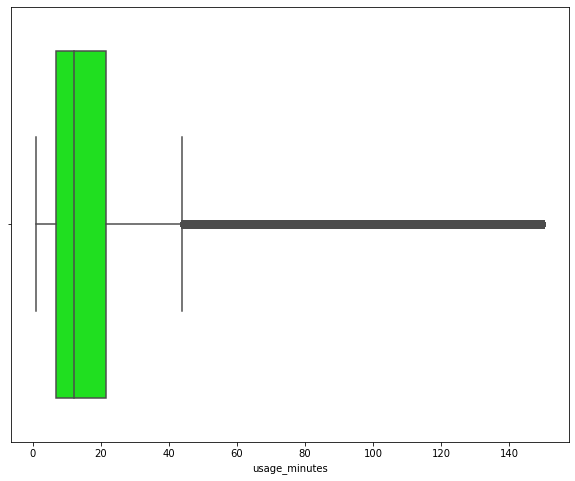

In [34]:
fig = plt.figure(figsize=(10,8))
sns.boxplot(x=drop_outlier1['usage_minutes'], color='lime')
plt.show()

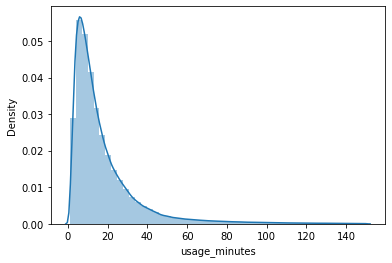

In [35]:
sns.distplot(drop_outlier1['usage_minutes'])
plt.show()

## Bining rental time to catagory

In [36]:
hours = pd.to_datetime(drop_outlier1['time'], format='%H:%M:%S').dt.hour


In [37]:
drop_outlier1['hour'] = hours

In [38]:
drop_outlier1.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,member_casual,ride_range,year,month,date,time,day_name,dayofweek,usage_minutes,hour
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,...,member,0 days 00:10:25,2021,1,2021-01-23,16:14:19,Saturday,5,10.416667,16
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,...,member,0 days 00:04:04,2021,1,2021-01-27,18:43:08,Wednesday,2,4.066667,18
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,...,member,0 days 00:01:20,2021,1,2021-01-21,22:35:54,Thursday,3,1.333333,22
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,...,member,0 days 00:11:42,2021,1,2021-01-07,13:31:13,Thursday,3,11.700000,13
9,B9F73448DFBE0D45,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,...,member,0 days 00:07:13,2021,1,2021-01-24,19:15:38,Sunday,6,7.216667,19


Text(0.5, 1.0, 'Average usage by time')

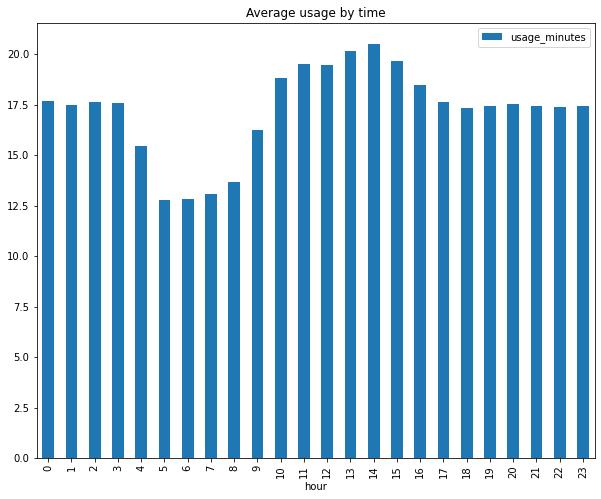

In [39]:
group_time = drop_outlier1.groupby('hour').agg({'usage_minutes': 'mean'})
group_time = group_time.sort_values(by="hour")
group_time.plot.bar(figsize=(10,8))
plt.title("Average usage by time")

Text(0.5, 1.0, 'Sum of usage by time')

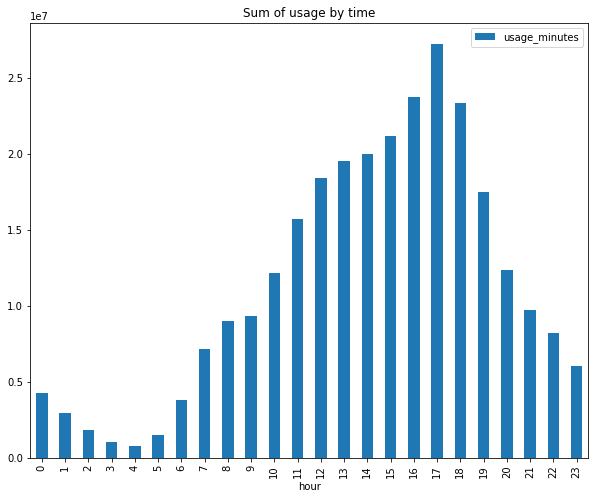

In [40]:
sum_group_time = drop_outlier1.groupby('hour').agg({'usage_minutes': 'sum'})
sum_group_time = sum_group_time.sort_values(by="hour")
sum_group_time.plot.bar(figsize=(10,8))
plt.title("Sum of usage by time")

## Create catagogy of time into 4 catagorys 
### 00.00-05.00 = 'Night', 06.00 - 12.00 = 'Morning',' 
### 13.00 - 18.00 = 'After noon', 19.00-24.00 = 'Evening '

In [41]:
drop_outlier1['time_cats'] = pd.cut(hours, 
                    bins=[0,5,12,18,24], 
                    include_lowest=True, 
                    labels=['Night','Morning','After noon','Evening '])

In [42]:
drop_outlier1.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,ride_range,year,month,date,time,day_name,dayofweek,usage_minutes,hour,time_cats
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,...,0 days 00:10:25,2021,1,2021-01-23,16:14:19,Saturday,5,10.416667,16,After noon
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,...,0 days 00:04:04,2021,1,2021-01-27,18:43:08,Wednesday,2,4.066667,18,After noon
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,...,0 days 00:01:20,2021,1,2021-01-21,22:35:54,Thursday,3,1.333333,22,Evening
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,...,0 days 00:11:42,2021,1,2021-01-07,13:31:13,Thursday,3,11.700000,13,After noon
9,B9F73448DFBE0D45,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,...,0 days 00:07:13,2021,1,2021-01-24,19:15:38,Sunday,6,7.216667,19,Evening


<AxesSubplot:title={'center':'Rental by time catagory'}>

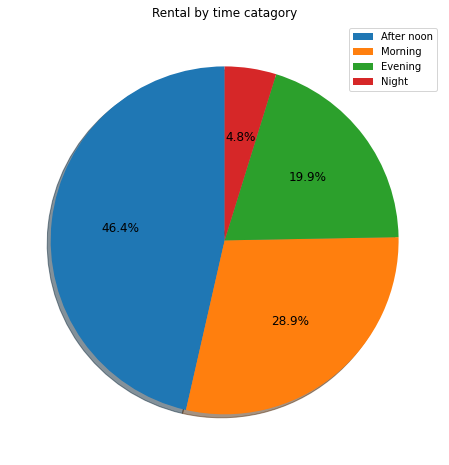

In [43]:
drop_outlier1['time_cats'].value_counts().plot(kind='pie',startangle=90,figsize=(10,8), 
autopct='%1.1f%%',shadow=True,legend=True, title='Rental by time catagory', ylabel='', labeldistance=None,fontsize=12)

## distance calculation 
### In the dataset provided started and ended point that can be calculated distance between 2 point im meter
### Please refer to this url
#### https://stackoverflow.com/questions/44446862/calculate-distance-between-latitude-and-longitude-in-dataframe

In [44]:
wgs84_geod = Geod(ellps='WGS84') #Distance will be measured on this ellipsoid - more accurate than a spherical method

#Get distance between pairs of lat-lon points
def Distance(lat1,lon1,lat2,lon2):
    az12,az21,dist = wgs84_geod.inv(lon1,lat1,lon2,lat2) #Yes, this order is correct
    return dist
drop_outlier1['dist'] = Distance(drop_outlier1['start_lat'].tolist(),drop_outlier1['start_lng'].tolist(),drop_outlier1['end_lat'].tolist(),drop_outlier1['end_lng'].tolist())

In [45]:
drop_outlier1.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,year,month,date,time,day_name,dayofweek,usage_minutes,hour,time_cats,dist
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,...,2021,1,2021-01-23,16:14:19,Saturday,5,10.416667,16,After noon,2245.917159
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,...,2021,1,2021-01-27,18:43:08,Wednesday,2,4.066667,18,After noon,557.774217
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,...,2021,1,2021-01-21,22:35:54,Thursday,3,1.333333,22,Evening,280.748233
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,...,2021,1,2021-01-07,13:31:13,Thursday,3,11.700000,13,After noon,2246.220360
9,B9F73448DFBE0D45,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,...,2021,1,2021-01-24,19:15:38,Sunday,6,7.216667,19,Evening,2037.591696


In [46]:
drop_outlier1.describe()

,start_lat,start_lng,end_lat,end_lng,ride_range,year,month,dayofweek,usage_minutes,hour,dist
count,1.550000e+07,1.550000e+07,1.549705e+07,1.549705e+07,15499999,15499999.0,1.550000e+07,1.550000e+07,1.550000e+07,1.550000e+07,1.549705e+07
mean,4.190118e+01,-8.764609e+01,4.190144e+01,-8.764629e+01,0 days 00:17:51.587577070,2021.0,7.455579e+00,3.179035e+00,1.785979e+01,1.424627e+01,2.222127e+03
std,4.596739e-02,2.866650e-02,4.607869e-02,2.885173e-02,0 days 00:18:23.487606473,0.0,2.461166e+00,1.997126e+00,1.839146e+01,5.053745e+00,1.961648e+03
min,4.164000e+01,-8.784000e+01,4.139000e+01,-8.897000e+01,0 days 00:01:00,2021.0,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,4.188169e+01,-8.766000e+01,4.188189e+01,-8.766011e+01,0 days 00:06:55,2021.0,6.000000e+00,1.000000e+00,6.916667e+00,1.100000e+01,9.455750e+02
50%,4.189897e+01,-8.764182e+01,4.189993e+01,-8.764288e+01,0 days 00:12:06,2021.0,8.000000e+00,3.000000e+00,1.210000e+01,1.500000e+01,1.660949e+03
75%,4.192914e+01,-8.762775e+01,4.192942e+01,-8.762775e+01,0 days 00:21:41,2021.0,9.000000e+00,5.000000e+00,2.168333e+01,1.800000e+01,2.914983e+03
max,4.207000e+01,-8.752000e+01,4.216812e+01,-8.749000e+01,0 days 02:30:00,2021.0,1.200000e+01,6.000000e+00,1.500000e+02,2.300000e+01,1.145675e+05


## Data visualization

In [47]:
drop_outlier1['member_casual'].value_counts()

member    8507666
casual    6992333
Name: member_casual, dtype: int64

<AxesSubplot:title={'center':'member_casual'}>

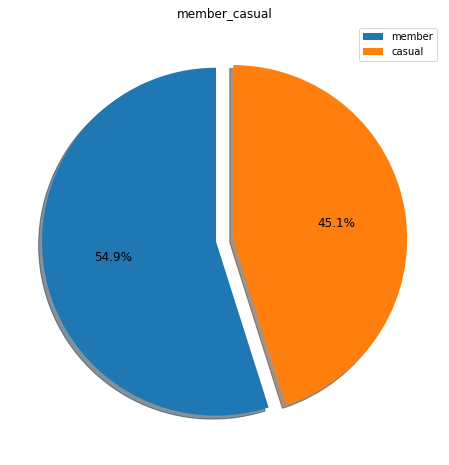

In [48]:
drop_outlier1['member_casual'].value_counts().plot(kind='pie',startangle=90,figsize=(10,8), 
autopct='%1.1f%%',shadow=True, explode=[0.05, 0.05],legend=True, title='member_casual', ylabel='', labeldistance=None,fontsize=12)


<AxesSubplot:xlabel='day_name'>

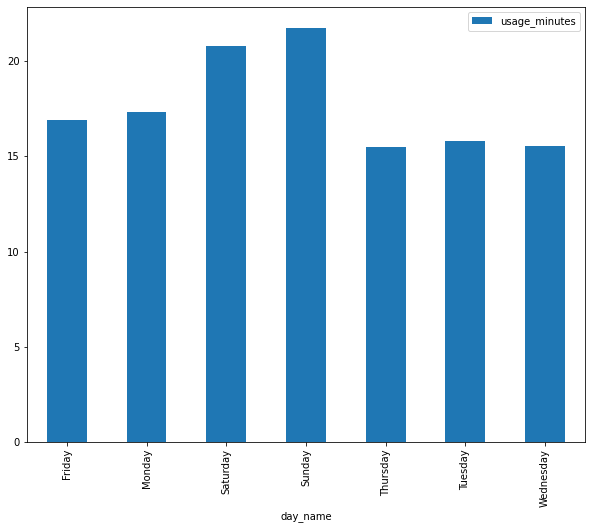

In [76]:
group_date = drop_outlier1.groupby('day_name').agg({'usage_minutes': 'mean'})
group_date = group_date.sort_values(by="day_name")
group_date.plot.bar(figsize=(10,8))

In [67]:
time_member_cats = drop_outlier1.groupby(['hour','member_casual'])[['usage_minutes','dist']].mean()
time_member_cats


usage_minutes         dist
hour member_casual                            
0    casual             21.016778  2120.521425
     member             12.244008  2152.522299
1    casual             20.214924  2190.714824
     member             12.619175  2119.922252
2    casual             20.044154  2303.469738
     member             12.781666  2168.198879
3    casual             20.004307  2360.144509
     member             12.928700  2149.503286
4    casual             18.391093  2470.681109
     member             11.927175  2485.462721
5    casual             16.708971  2429.269484
     member             11.111806  2407.757924
6    casual             15.655696  2288.546241
     member             11.907966  2343.903662
7    casual             16.454404  2338.180386
     member             12.031435  2311.456343
8    casual             18.783676  2303.054271
     member             11.823208  2195.315072
9    casual             23.201315  2327.532157
     member             12.216242  2108.272352
10   casual             26.188976  2368.466328
     member             12.936473  2099.403536
11   casual             26.794374  2404.601965
     member             13.209528  2062.916700
12   casual             26.662120  2383.336495
     member             13.057545  2000.353921
13   casual             27.220173  2388.246317
     member             13.329416  2065.317843
14   casual             27.147332  2360.942232
     member             13.754478  2154.914392
15   casual             26.079179  2359.585574
     member             13.670772  2190.237408
16   casual             24.550283  2366.389601
     member             13.648995  2261.603005
17   casual             22.884697  2372.150077
     member             13.724075  2259.433984
18   casual             22.134958  2255.674154
     member             13.545213  2159.153995
19   casual             22.246119  2135.503702
     member             13.316740  2077.817744
20   casual             22.291832  2067.491940
     member             13.081591  2058.704749
21   casual             21.793143  2085.580077
     member             12.785238  2111.434432
22   casual             21.032242  2159.677531
     member             12.676812  2189.326048
23   casual             20.913935  2146.354327
     member             12.424789  2187.412135

<AxesSubplot:xlabel='hour,member_casual'>

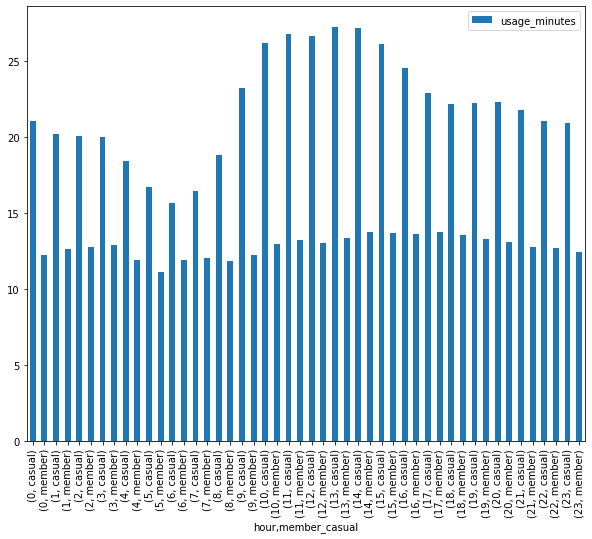

In [70]:
time_member_cats.plot(kind = 'bar',y='usage_minutes',figsize=(10,8))

In [56]:
drop_outlier1['ride_id'].count()

15499999

In [57]:
drop_outlier1['rideable_type'].value_counts()


classic_bike     9023797
electric_bike    5640989
docked_bike       835213
Name: rideable_type, dtype: int64

<AxesSubplot:title={'center':'rideable_type'}>

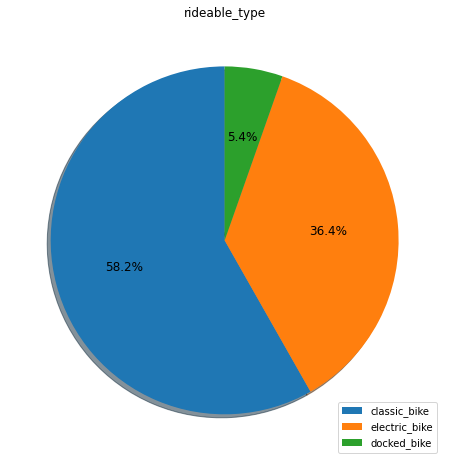

In [58]:
drop_outlier1['rideable_type'].value_counts().plot(kind='pie',startangle=90,figsize=(10,8), 
autopct='%1.1f%%',shadow=True,legend=True, title='rideable_type', ylabel='', labeldistance=None,fontsize=12)

In [ ]:
###

In [59]:
drop_outlier1.to_csv(r"bike_trip_2021_preprocess.csv",index=False)